In [27]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

### 定义人造数据集函数

In [32]:
def synthetic_data(w,b,num_examples):
    #len函数取第一个维度的长度
    X=torch.normal(0,1,(num_examples,len(w)))
    #X中每条数据有len(w)个特征，总共num_examples条数据
    #每条数据存储在一行，因此X的形状为(num_examples,len(w))
    #X相当于采样点
    y=torch.matmul(X,w)+b
    #matlmul为矩阵乘法，一维向量参与运算时，会将一维向量视为列向量
    #+b运用到了广播机制
    y+=torch.normal(0,0.01,y.shape)
    print(X.shape,w.shape,y.shape)
    return X,y.reshape((-1,1))
true_w = torch.tensor([2,-3,4],dtype=torch.float32)
true_b=4
features,labels=synthetic_data(true_w,true_b,1000)

torch.Size([1000, 3]) torch.Size([3]) torch.Size([1000])


torch.Size([1000, 1])
torch.Size([1000, 3])


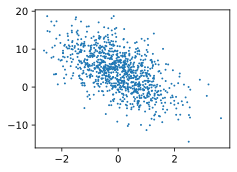

In [34]:
print(labels.shape)
print(features.shape)
d2l.set_figsize()
d2l.plt.scatter(features[:,(1)].detach().numpy(),labels.detach().numpy(),1)

In [37]:
def data_iter(batch_size,features,labels):
    num_examples=len(features)
    indices=list(range(num_examples))#range本身返回的是一个range对象，需要用list转换为列表
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        batch_indices=torch.tensor(indices[i:min(i+batch_size,num_examples)])


In [38]:
w=torch.normal(0,0.01,size=(2,1),requires_grad=True)
b=torch.zeros(1,requires_grad=True)

In [39]:
def linreg(X,w,b):
    return torch.matmul(X,w)+b

In [40]:
def squared_loss(y_hat,y):
    return (y_hat-y.reshape(y_hat.shape))**2/2

In [41]:
def sgd(params,lr,batch_size):
    with torch.no_grad():
        for param in params:
            param-=lr*param.grad/batch_size
            param.grad.zero_()

In [ ]:
lr=0.03
num_epochs=3
net=linreg
loss=squared_loss
batch_size=10

for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features,labels):
        l=loss(net(X,w,b),y)
        l.sum().backward()
        sgd([w,b],lr,batch_size)
    with torch.no_grad():
        train_l=loss(net(features,w,b),labels)